# New Section

### @Author : uzma S. L.

### This notebook perform 5 folds cross validation on Xception model


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, TensorBoard
from keras.preprocessing import image
from keras.applications import Xception
from keras.layers import *
from keras.optimizers import *
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import random
# import splitfolders
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datadir = '/content/drive/MyDrive/Project/Segmented Medicinal Leaf Images'
categories = os.listdir(datadir)

In [ ]:
len(categories)

30

In [ ]:
# Loading data
data = []
for category in categories:
  path = os.path.join(datadir, category)
  labels = categories.index(category)
  for imgpath in os.listdir(path):
    imgs = image.load_img(os.path.join(path, imgpath),target_size=(299,299))
    data.append((imgs, labels))

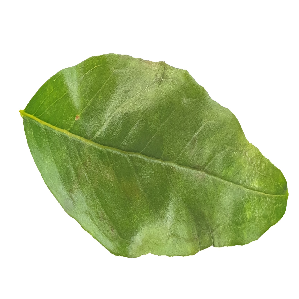

In [ ]:
data[45][0]

In [ ]:
len(data)

1835

In [ ]:
random.shuffle(data)

In [ ]:
X_img = []
y_lab = []
for img , label in data:
  X_img.append(img)
  y_lab.append(label)

In [ ]:
X_list = [ image.img_to_array(img) for img in X_img]

In [ ]:
X = np.asarray(X_list)


In [ ]:
X.shape

(1835, 299, 299, 3)

In [ ]:
X /= 255

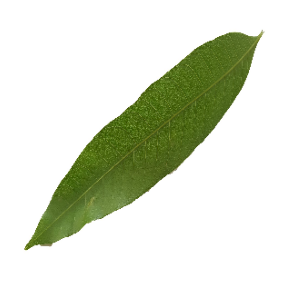

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(X[170])
plt.axis('off')
plt.show()

In [ ]:
y = np.asarray(y_lab)

In [ ]:
y.shape

(1835,)

In [ ]:
# we got our X and y till now

In [ ]:
classes = 30
batch_size = 32
img_height = 299
img_width = 299

In [ ]:
# build model function
def build_model():

  xception = Xception(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

  xcp = xception.output
  xcp = GlobalAveragePooling2D()(xcp)
  predictions = Dense(classes, activation = 'softmax')(xcp)

  model = Model(xception.input, predictions)

  for layer in xception.layers:
    layer.trainable = False

  return model




In [ ]:
# 5 fold cross validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)

In [ ]:


count = 1
for train_index, test_index in kf.split(X):

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  model = build_model()

  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  callbacks = [EarlyStopping(monitor='val_accuracy', patience=2,verbose=1),
              TensorBoard(log_dir=f'./logs{count}')
             ]

  history = model.fit(X_train ,y_train,epochs = 10,batch_size = 32,verbose = 2,callbacks= callbacks ,validation_data=(X_test,y_test))
  
  count += 1
  
 

83689472/83683744 [==============================] - 1s 0us/step
Epoch 1/10
46/46 - 42s - loss: 2.2754 - accuracy: 0.4911 - val_loss: 1.4923 - val_accuracy: 0.7330
Epoch 2/10
46/46 - 8s - loss: 1.0791 - accuracy: 0.8617 - val_loss: 0.9355 - val_accuracy: 0.8501
Epoch 3/10
46/46 - 8s - loss: 0.6882 - accuracy: 0.9196 - val_loss: 0.7207 - val_accuracy: 0.8692
Epoch 4/10
46/46 - 8s - loss: 0.5099 - accuracy: 0.9401 - val_loss: 0.5960 - val_accuracy: 0.8965
Epoch 5/10
46/46 - 8s - loss: 0.4078 - accuracy: 0.9496 - val_loss: 0.5271 - val_accuracy: 0.9074
Epoch 6/10
46/46 - 8s - loss: 0.3387 - accuracy: 0.9578 - val_loss: 0.4868 - val_accuracy: 0.9128
Epoch 7/10
46/46 - 8s - loss: 0.2903 - accuracy: 0.9680 - val_loss: 0.4423 - val_accuracy: 0.9155
Epoch 8/10
46/46 - 8s - loss: 0.2545 - accuracy: 0.9700 - val_loss: 0.4194 - val_accuracy: 0.9155
Epoch 9/10
46/46 - 8s - loss: 0.2285 - accuracy: 0.9734 - val_loss: 0.3936 - val_accuracy: 0.9210
Epoch 10/10
46/46 - 8s - loss: 0.2059 - accuracy: 0.

### Loss and Accuracy Plots of each Fold on Train and Validation

In [ ]:
%reload_ext tensorboard

In [ ]:
%tensorboard --logdir logs1

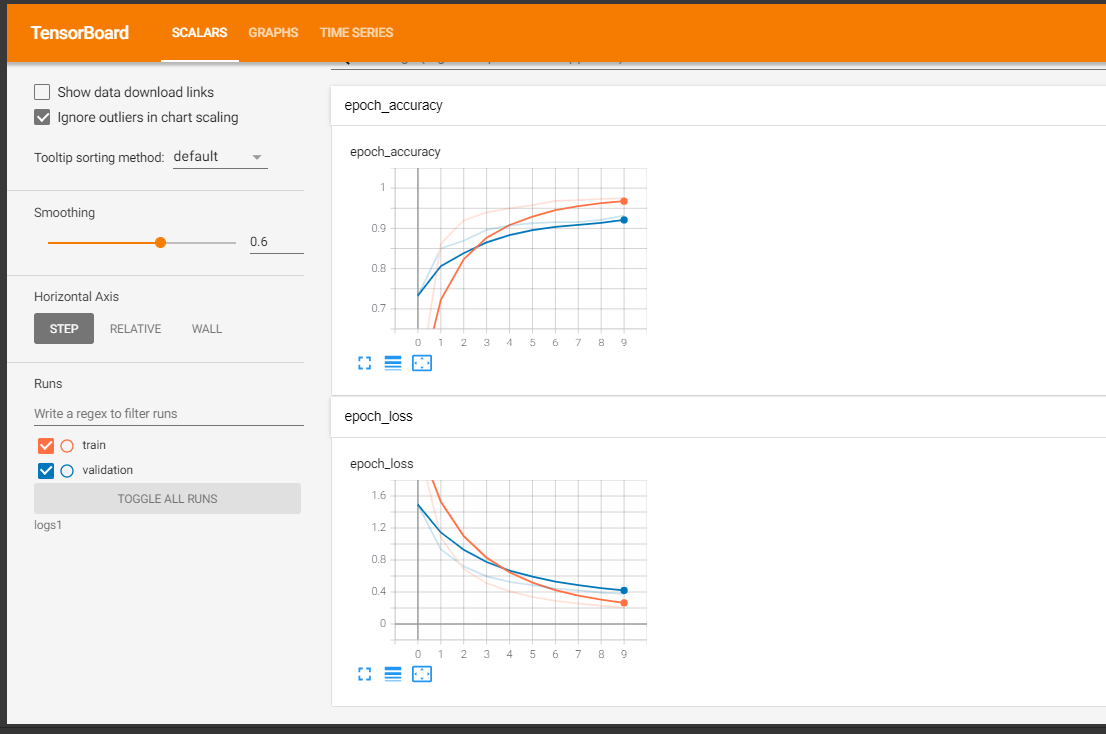

In [ ]:
%tensorboard --logdir logs2

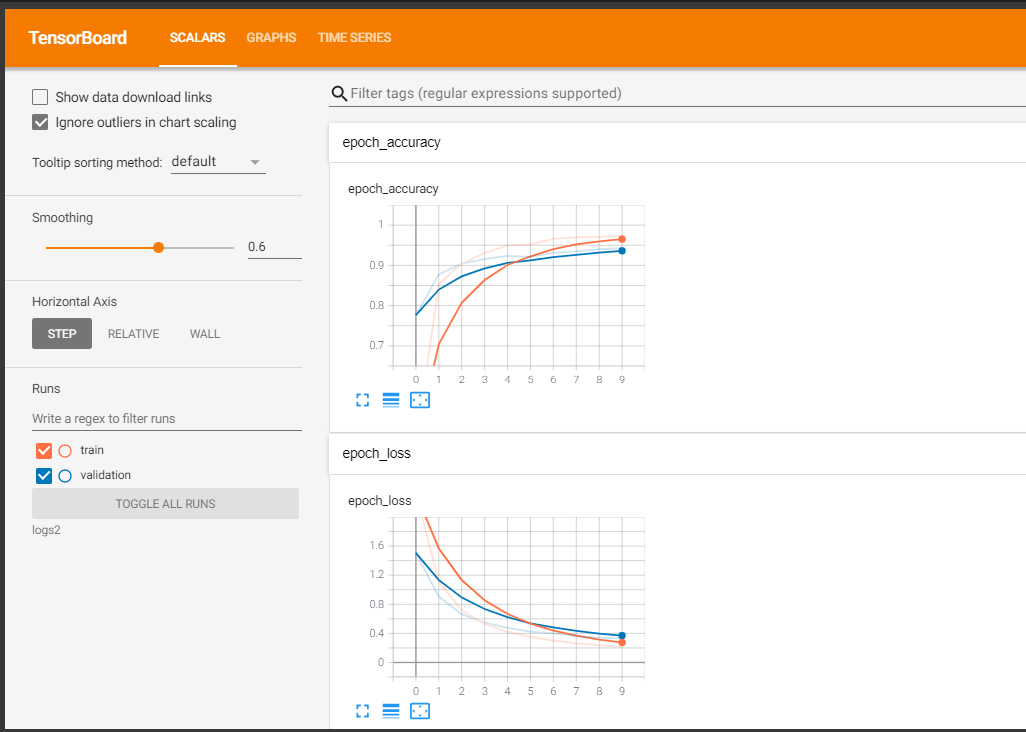

In [ ]:
%tensorboard --logdir logs3

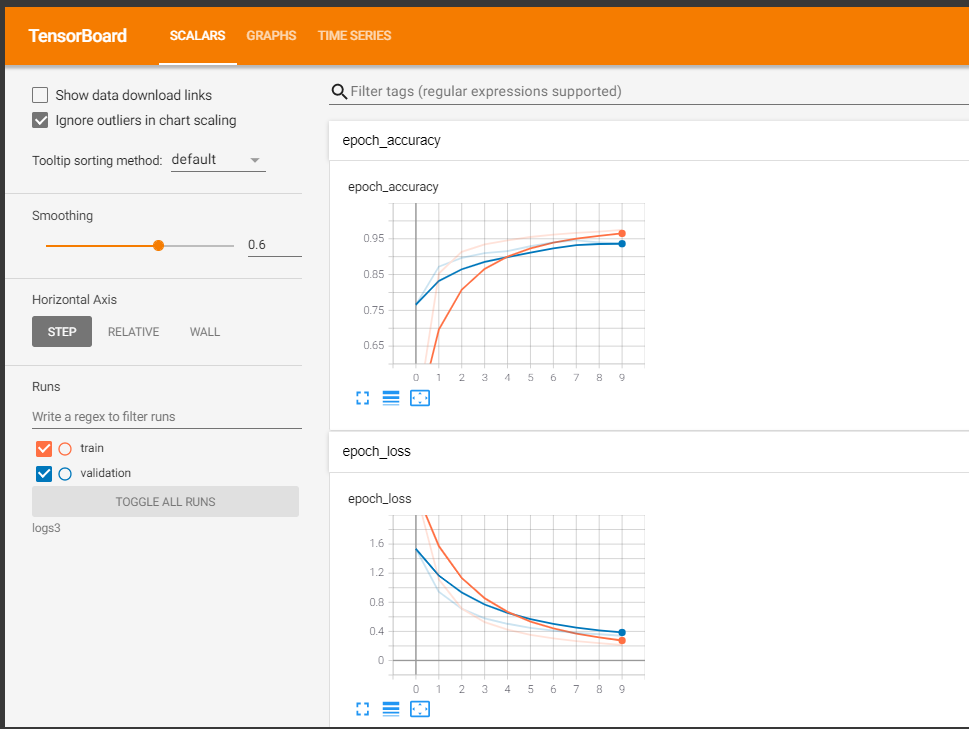

In [ ]:
%tensorboard --logdir logs4

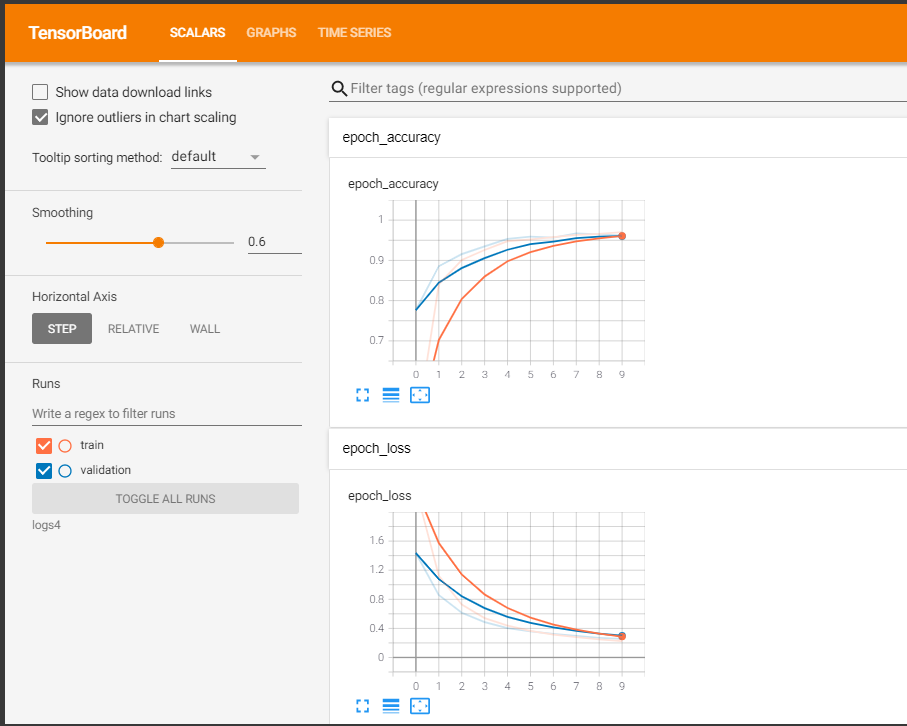

In [ ]:
%tensorboard --logdir logs5

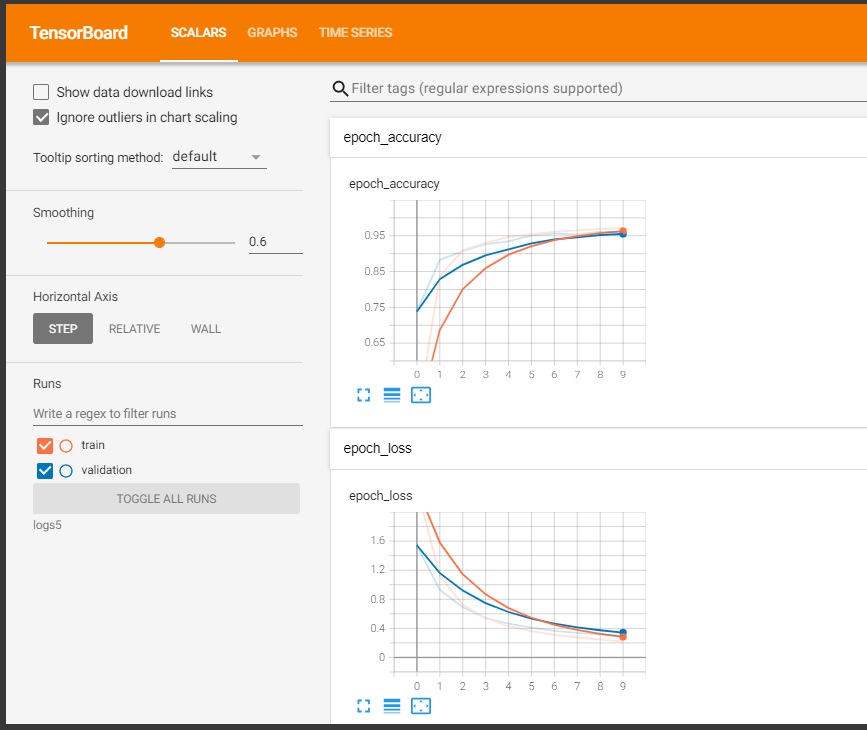